# House Price Prediction - Data Science Project

In [1]:

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")


## Step 1: Load Dataset

In [4]:

# Load dataset
df = pd.read_csv("D:\Data\data.csv")

# Display first few rows
df.head()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


## Step 2: Data Preprocessing

In [5]:

# Drop irrelevant columns
df.drop(columns=["date", "street", "country"], inplace=True)

# Fill missing values with median values
df.fillna(df.median(numeric_only=True), inplace=True)

# Identify categorical columns
categorical_cols = ["city", "statezip"]

# Apply One-Hot Encoding
preprocessor = ColumnTransformer(
    transformers=[("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)],
    remainder="passthrough"
)

# Extract features and target variable
X = df.drop(columns=["price"])
y = df["price"]

# Transform categorical features
X_transformed = preprocessor.fit_transform(X)

# Convert to numerical array
X_transformed = X_transformed.toarray()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)


## Step 3: Train Regression Models

In [6]:

# Initialize models
regressors = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Gradient Boosting": GradientBoostingRegressor()
}

# Train and evaluate models
results = {}
for name, model in regressors.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {"MAE": mae, "MSE": mse, "R2 Score": r2}

# Display results
results


{'Linear Regression': {'MAE': 155719.90324967276,
  'MSE': 963753910923.9382,
  'R2 Score': 0.05500086332440424},
 'Random Forest': {'MAE': 156229.9551127847,
  'MSE': 971888907084.6212,
  'R2 Score': 0.04702417522844127},
 'Decision Tree': {'MAE': 199970.8387562489,
  'MSE': 1021943919372.4673,
  'R2 Score': -0.0020567601246024303},
 'Gradient Boosting': {'MAE': 156668.4026886148,
  'MSE': 960887045142.1426,
  'R2 Score': 0.05781193953177799}}

## Step 4: Visualize Model Performance

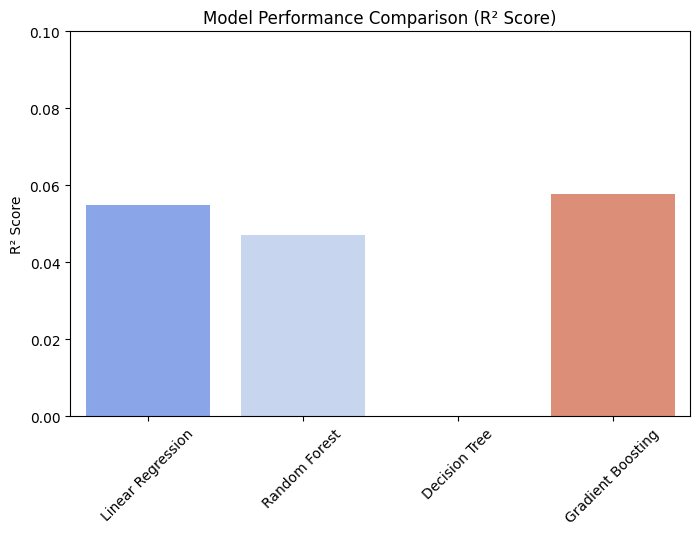

In [7]:

# Create a bar chart for R2 scores
plt.figure(figsize=(8, 5))
sns.barplot(x=list(results.keys()), y=[res["R2 Score"] for res in results.values()], palette="coolwarm")

# Customize plot
plt.ylim(0, 0.1)
plt.ylabel("R² Score")
plt.title("Model Performance Comparison (R² Score)")
plt.xticks(rotation=45)

# Show plot
plt.show()


## Additional Visualizations

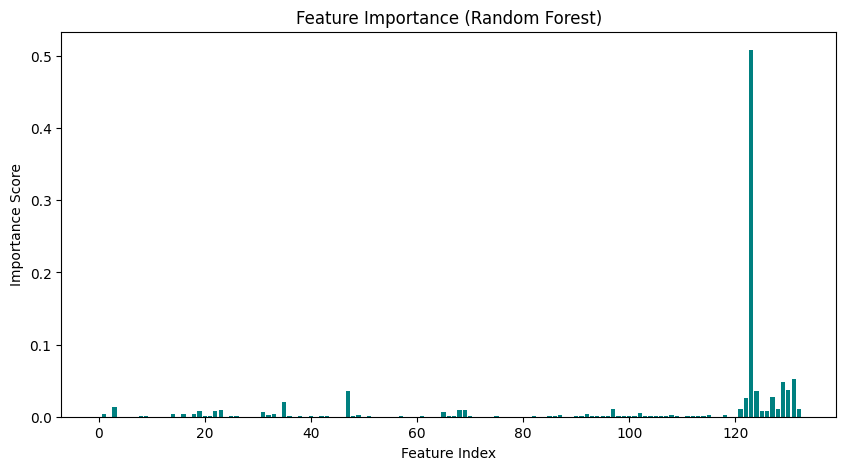

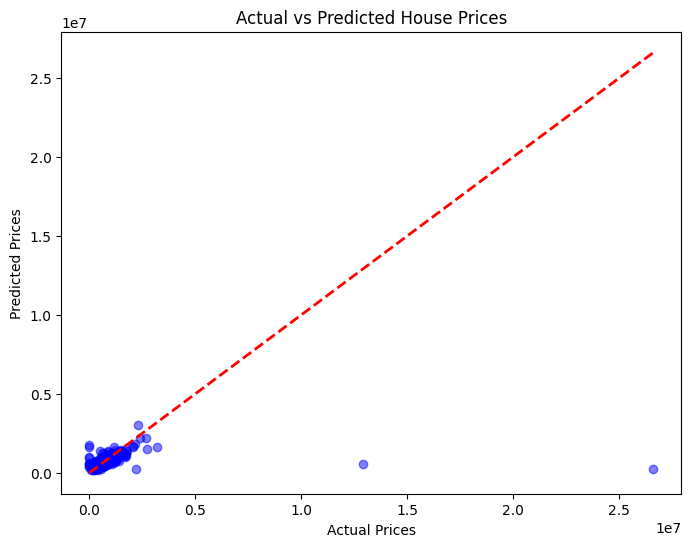

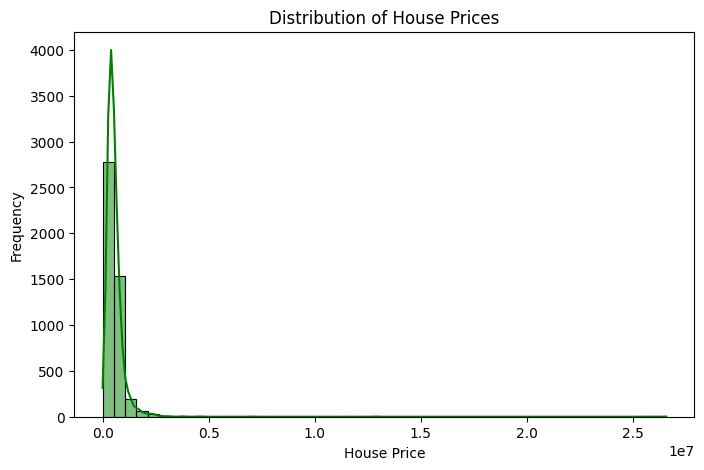

In [8]:


# Feature Importance (Random Forest)
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
importances = rf_model.feature_importances_

plt.figure(figsize=(10, 5))
plt.bar(range(len(importances)), importances, color='teal')
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Feature Index")
plt.ylabel("Importance Score")
plt.show()

# Actual vs Predicted Prices
best_model = GradientBoostingRegressor()
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_best, alpha=0.5, color="blue")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], "--r", linewidth=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()

# House Price Distribution
plt.figure(figsize=(8, 5))
sns.histplot(y, bins=50, kde=True, color="green")
plt.xlabel("House Price")
plt.ylabel("Frequency")
plt.title("Distribution of House Prices")
plt.show()
